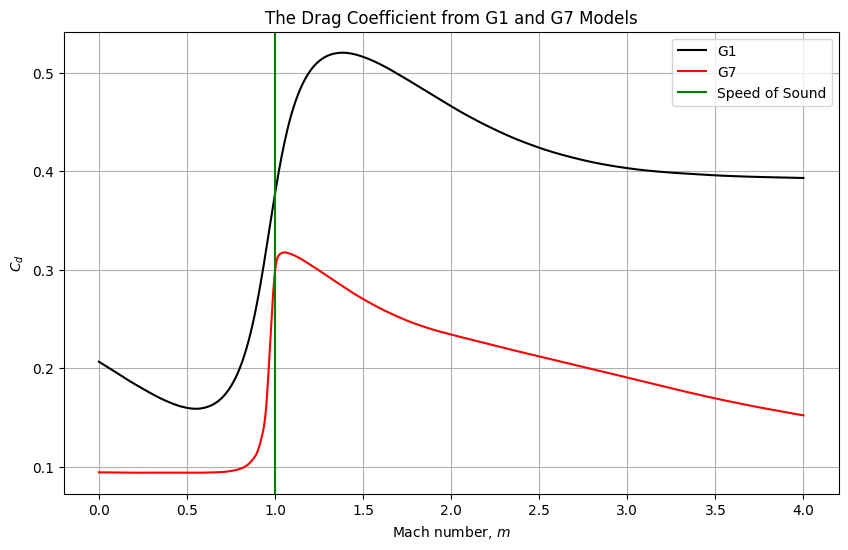

In [7]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

class BallisticsModel:
    def __init__(self, bc=0.545, vx=2740, mass=0.0194, model='G1', units='imperial'):
        self.bc = bc
        self.vx = vx
        self.mass = mass
        self.model = model
        self.units = units

        # G1 Model Data
        self.g1_data = np.array([[0.00, 0.2629], [0.05, 0.2558], [0.10, 0.2487], [0.15, 0.2413],
                                [0.20, 0.2344], [0.25, 0.2278], [0.30, 0.2214], [0.35, 0.2155],
                                [0.40, 0.2104], [0.45, 0.2061], [0.50, 0.2032], [0.55, 0.2020],
                                [0.60, 0.2034], [0.70, 0.2165], [0.725, 0.2230], [0.75, 0.2313],
                                [0.775, 0.2417], [0.80, 0.2546], [0.825, 0.2706], [0.85, 0.2901],
                                [0.875, 0.3136], [0.90, 0.3415], [0.925, 0.3734], [0.95, 0.4084],
                                [0.975, 0.4448], [1.0, 0.4805], [1.025, 0.5136], [1.05, 0.5427],
                                [1.075, 0.5677], [1.10, 0.5883], [1.125, 0.6053], [1.15, 0.6191],
                                [1.20, 0.6393], [1.25, 0.6518], [1.30, 0.6589], [1.35, 0.6621],
                                [1.40, 0.6625], [1.45, 0.6607], [1.50, 0.6573], [1.55, 0.6528],
                                [1.60, 0.6474], [1.65, 0.6413], [1.70, 0.6347], [1.75, 0.6280],
                                [1.80, 0.6210], [1.85, 0.6141], [1.90, 0.6072], [1.95, 0.6003],
                                [2.00, 0.5934], [2.05, 0.5867], [2.10, 0.5804], [2.15, 0.5743],
                                [2.20, 0.5685], [2.25, 0.5630], [2.30, 0.5577], [2.35, 0.5527],
                                [2.40, 0.5481], [2.45, 0.5438], [2.50, 0.5397], [2.60, 0.5325],
                                [2.70, 0.5264], [2.80, 0.5211], [2.90, 0.5168], [3.00, 0.5133],
                                [3.10, 0.5105], [3.20, 0.5084], [3.30, 0.5067], [3.40, 0.5054],
                                [3.50, 0.5040], [3.60, 0.5030], [3.70, 0.5022], [3.80, 0.5016],
                                [3.90, 0.5010], [4.00, 0.5006], [4.20, 0.4998], [4.40, 0.4995],
                                [4.60, 0.4992], [4.80, 0.4990], [5.00, 0.4988]])
        # G7 Model Data
        self.g7_data = np.array([[0.00, 0.1198], [0.05, 0.1197], [0.10, 0.1196], [0.15, 0.1194],
                                [0.20, 0.1193], [0.25, 0.1194], [0.30, 0.1194], [0.35, 0.1194],
                                [0.40, 0.1193], [0.45, 0.1193], [0.50, 0.1194], [0.55, 0.1193],
                                [0.60, 0.1194], [0.65, 0.1197], [0.70, 0.1202], [0.725, 0.1207],
                                [0.75, 0.1215], [0.775, 0.1226], [0.80, 0.1242], [0.825, 0.1266],
                                [0.85, 0.1306], [0.875, 0.1368], [0.90, 0.1464], [0.925, 0.1660],
                                [0.95, 0.2054], [0.975, 0.2993], [1.0, 0.3803], [1.025, 0.4015],
                                [1.05, 0.4043], [1.075, 0.4034], [1.10, 0.4014], [1.125, 0.3987],
                                [1.15, 0.3955], [1.20, 0.3884], [1.25, 0.3810], [1.30, 0.3732],
                                [1.35, 0.3657], [1.40, 0.3580], [1.50, 0.3440], [1.55, 0.3376],
                                [1.60, 0.3315], [1.65, 0.3260], [1.70, 0.3209], [1.75, 0.3160],
                                [1.80, 0.3117], [1.85, 0.3078], [1.90, 0.3042], [1.95, 0.3010],
                                [2.00, 0.2980], [2.05, 0.2951], [2.10, 0.2922], [2.15, 0.2892],
                                [2.20, 0.2864], [2.25, 0.2835], [2.30, 0.2807], [2.35, 0.2779],
                                [2.40, 0.2752], [2.45, 0.2725], [2.50, 0.2697], [2.55, 0.2670],
                                [2.60, 0.2643], [2.65, 0.2615], [2.70, 0.2588], [2.75, 0.2561],
                                [2.80, 0.2533], [2.85, 0.2506], [2.90, 0.2479], [2.95, 0.2451],
                                [3.00, 0.2424], [3.10, 0.2368], [3.20, 0.2313], [3.30, 0.2258],
                                [3.40, 0.2205], [3.50, 0.2154], [3.60, 0.2106], [3.70, 0.2060],
                                [3.80, 0.2017], [3.90, 0.1975], [4.00, 0.1935], [4.20, 0.1861],
                                [4.40, 0.1793], [4.60, 0.1730], [4.80, 0.1672], [5.00, 0.1618]])

        # Create interpolation functions for both models
        self._create_interpolators()

        # # Constants
        # if self.units == 'metric':
        #     self.g = 9.81     # m/s^2
        #     self.rho = 1.225  # kg/m^3 at sea level
        #     self.vs = 340.3   # m/s speed of sound
        # else:  # imperial
        #     self.g = 32.174     # ft/s^2
        #     self.rho = 0.07647  # lb/ft^3 at sea level
        #     self.vs = 1116.4    # ft/s speed of sound

    def _create_interpolators(self):
        # Convert Kd to Cd using the formula Cd = (pi/4) * Kd
        g1_cd = (np.pi/4) * self.g1_data[:, 1]
        g7_cd = (np.pi/4) * self.g7_data[:, 1]

        # Create interpolation functions
        self.g1_interp = interp1d(self.g1_data[:, 0], g1_cd, kind='cubic',
                                 bounds_error=False, fill_value='extrapolate')
        self.g7_interp = interp1d(self.g7_data[:, 0], g7_cd, kind='cubic',
                                 bounds_error=False, fill_value='extrapolate')

    @property
    def g(self):
        """
        Get the acceleration due to gravity
        """
        if self.units == 'metric':
            return 9.81       # m/s^2
        else:  # imperial
            return 32.174     # ft/s^2

    @property
    def rho(self):
        """
        Air density
        """
        if self.units == 'metric':
            return 1.225      # kg/m^3 at sea level
        else:  # imperial
            return 0.07647    # lb/ft^3 at sea level

    @property
    def vs(self):
        """
        Speed of sound
        """
        if self.units == 'metric':
            return 340.3     # m/s speed of sound
        else:  # imperial
            return 1116.4    # ft/s speed of sound

    # def get_bc(self):
    #     if self.units == 'metric':
    #         self.bc / 14.59     # m/s speed of sound
    #     else:  # imperial
    #         self.bc


    def get_cd(self, mach, model='G1'):
        """
        Get the drag coefficient for a given Mach number and model

        Parameters:
        mach: Mach number(s)
        model: 'G1' or 'G7'

        Returns:
        drag coefficient(s)
        """
        if model.upper() == 'G1':
            return self.g1_interp(mach)
        elif model.upper() == 'G7':
            return self.g7_interp(mach)
        else:
            raise ValueError("Model must be either 'G1' or 'G7'")

    def get_drag(self, v):
        """
        Compute magnitude of drag acceleration

        Parameters:
        v: velocity magnitude in m/s if metric, ft/s if imperial

        Returns:
        drag acceleration magnitude in m/s^2 if metric, ft/s^2 if imperial
        """
        # Calculate Mach number
        mach = abs(v) / self.vs

        # Get drag coefficient for current Mach number
        cd = self.get_cd(mach)

        # Calculate drag acceleration magnitude
        drag = (self.rho * cd * v**2) / (2 * self.bc)

        return drag

    def plot_drag_coefficients(self, mach_range=(0, 4)):
        mach = np.linspace(mach_range[0], mach_range[1], 1000)

        plt.figure(figsize=(10, 6))
        plt.plot(mach, self.get_cd(mach, 'G1'), 'black', label='G1')
        plt.plot(mach, self.get_cd(mach, 'G7'), 'red', label='G7')

        # Add vertical line at Mach 1
        plt.axvline(x=1, color='green', label='Speed of Sound')

        plt.xlabel(r'Mach number, $m$')
        plt.ylabel(r'$C_d$')
        plt.title('The Drag Coefficient from G1 and G7 Models')
        plt.grid(True)
        plt.legend()
        plt.show()

# Create an instance of the BallisticsModel class
ballistics = BallisticsModel()
ballistics.plot_drag_coefficients()

In [8]:
import numpy as np

def projectile(t,y,b):
   """
   Implements 2D projectile motion with drag force.

   Args:
      t: time (unused but required by ODE solver)
      y: state vector [x, y, vx, vy]
      b: ballistic model object with get_drag(), g, and mass

   Returns:
      array of [dx/dt, dy/dt, dvx/dt, dvy/dt]
   """
   # Extract positions and velocities from state vector
   x, y, vx, vy = y

   # Calculate velocity magnitude
   v_mag = np.sqrt(vx**2 + vy**2)

   # Get drag force magnitude from ballistic model
   f_d = b.get_drag(v_mag)

   # Calculate accelerations
   # ax = -(f_d/b.mass * vx/v_mag) # Drag force in x direction
   # ay = -b.g - (f_d/b.mass * vy/v_mag) # Gravity + drag force in y direction
   ax = -(f_d * vx/v_mag) # Drag force in x direction
   ay = -b.g - (f_d * vy/v_mag) # Gravity + drag force in y direction

   return np.array([vx, vy, ax, ay])

In [9]:
# Bullet to model
# https://www.lapua.com/product/6-5-creedmoor-open-tip-match-target-cartridge-scenar-l88g-136gr-4316063/

# Caliber: 6.5 Creedmoor
# Muzzle veolcity: 835 m/s (2740 ft/s)
# Bullet BC G1: 0.545
# Bullet BC G7: 0.274
# Bullet weight: 136 gr (8.8 g) = 0.0194 lbs

In [10]:
# Bullet to model
# https://www.lapua.com/product/6-5-creedmoor-open-tip-match-target-cartridge-scenar-l88g-136gr-4316063/

import matplotlib.pyplot as plt
import numpy as np

# Bullet data from manufacturer Lapua
distances = np.array([0, 100, 200, 300, 600, 800, 1000])  # in yards

# Position drops (in inches)
positions_100 = np.array([0, 0, -4, -13, -88, -189, -348])
positions_300 = np.array([0, 4, 5, 0, -61, -153, -303])
positions_600 = np.array([0, 15, 26, 31, 0, -71, -201])
positions = positions_100  # Choose the set of positions to use

# Velocities (in fps)
velocities = np.array([2740, 2573, 2409, 2250, 1812, 1554, 1326])

[]

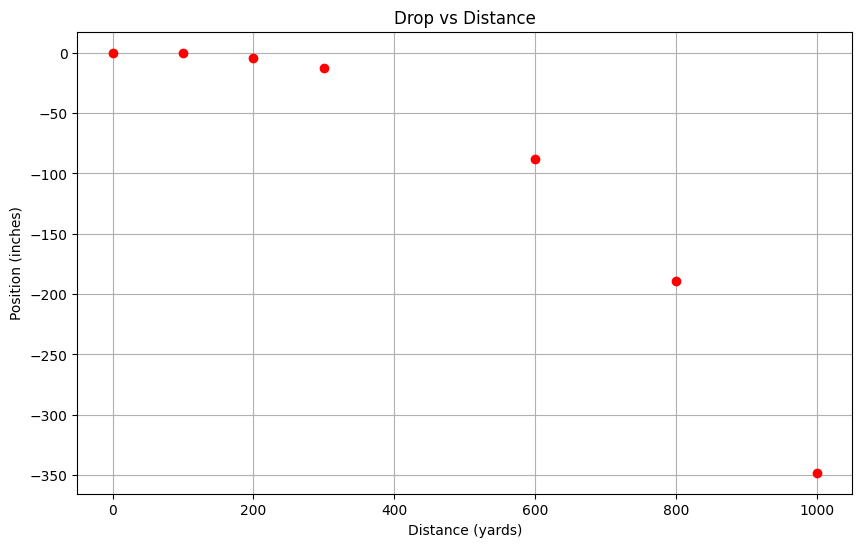

In [11]:
# Plot manufacturer bullet position data
plt.figure(figsize=(10, 6))
plt.plot(distances, positions, 'ro', label='Lapua Bullet Data')
plt.xlabel('Distance (yards)')
plt.ylabel('Position (inches)')
plt.title('Drop vs Distance')
plt.grid()
plt.plot()

[]

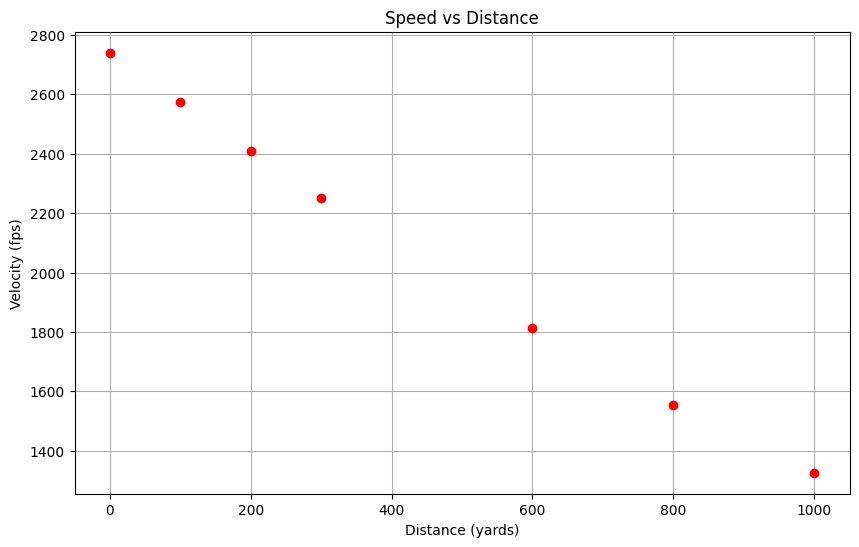

In [12]:
# Plot manufacturer bullet velocity data
plt.figure(figsize=(10, 6))
plt.plot(distances, velocities, 'ro', label='Lapua Bullet Data')
plt.xlabel('Distance (yards)')
plt.ylabel('Velocity (fps)')
plt.title('Speed vs Distance')
plt.grid()
plt.plot()

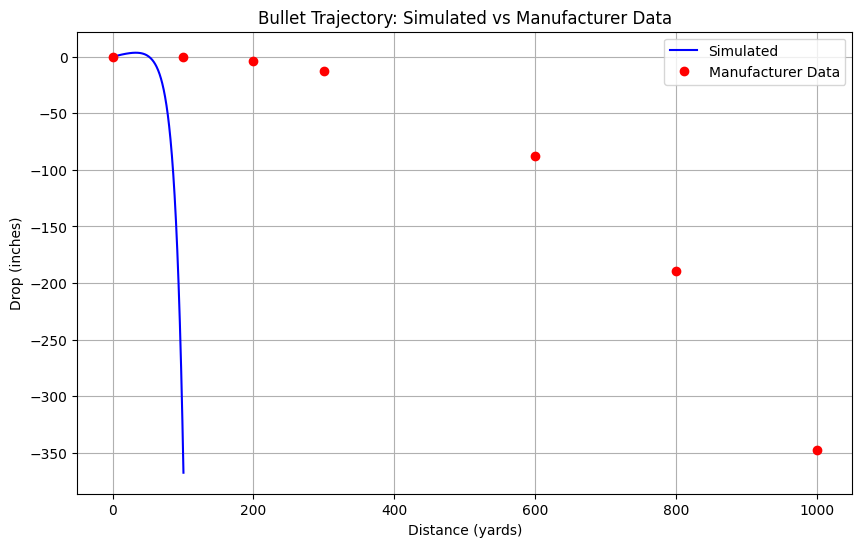

In [13]:
import ode_solver

bullet = BallisticsModel(bc=0.545, vx=2740, mass=0.0194, model='G1', units='imperial')

# Initial conditions
elevation_angle = 0.25  # degrees (typical for long range shooting)
angle_rad = np.radians(elevation_angle)

# Split velocity into components using the elevation angle
vx_init = bullet.vx * np.cos(angle_rad)
vy_init = bullet.vx * np.sin(angle_rad)

# Initial state vector [x, y, vx, vy]
initial_state = np.array([0, 0, vx_init, vy_init])  # [x, y, vx, vy]
tspan = [0, 2]

# Solve the ODE
t, y = ode_solver.solve_ode(projectile, tspan, initial_state, ode_solver.EulerRichardson, (bullet,))

# Extract trajectory data and convert to consistent units
x_sim = y[:, 0] / 3  # convert feet to yards
y_sim = y[:, 1] * 12  # convert feet to inches for drop comparison

plt.figure(figsize=(10, 6))
plt.plot(x_sim, y_sim, 'b-', label='Simulated')
plt.plot(distances, positions, 'ro', label='Manufacturer Data')
plt.xlabel('Distance (yards)')
plt.ylabel('Drop (inches)')
plt.title('Bullet Trajectory: Simulated vs Manufacturer Data')
plt.grid(True)
plt.legend()
plt.show()